## Proyecto

In [346]:
import seaborn as sb
import sklearn as sc
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression



carga de datos a memoria

In [23]:
data = np.load('proyecto_training_data.npy')

segmentacion de datos

In [24]:
largo = len(data)
tlargo = int(largo *0.8)

datatrain = np.nan_to_num(data[:tlargo])
datatest = data[tlargo:]
cols = ['SalePrice','OverallQual','FstFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage']

In [25]:
dt = pd.DataFrame(datatrain,columns=cols)

In [164]:
dt

,SalePrice,OverallQual,FstFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1163,108959.0,4.0,1258.0,6.0,1969.0,60.0
1164,194000.0,5.0,1432.0,5.0,1978.0,0.0
1165,233170.0,7.0,1502.0,7.0,2009.0,79.0
1166,245350.0,8.0,1694.0,7.0,2008.0,64.0


In [27]:
def estadistica_desc(val,nombre):
    print('Estadistica de ' + nombre)
    print('  Media: ', np.mean(val[nombre]))
    print('  Maximo', np.max(val[nombre]))
    print('  Minimo', np.min(val[nombre]))
    print('  Rango', np.ptp(val[nombre],axis=0)) # rango entre minimo y maximo
    print('  Desv St', np.std(val[nombre]))

estadistica_desc(dt,'SalePrice')
estadistica_desc(dt,'OverallQual')
estadistica_desc(dt,'FstFlrSF')
estadistica_desc(dt,'TotRmsAbvGrd')
estadistica_desc(dt,'YearBuilt')
estadistica_desc(dt,'LotFrontage')


Estadistica de SalePrice
  Media:  180590.27739726027
  Maximo 755000.0
  Minimo 34900.0
  Rango 720100.0
  Desv St 78781.95108033359
Estadistica de OverallQual
  Media:  6.101027397260274
  Maximo 10.0
  Minimo 1.0
  Rango 9.0
  Desv St 1.3774351932407467
Estadistica de FstFlrSF
  Media:  1156.3236301369864
  Maximo 3228.0
  Minimo 334.0
  Rango 2894.0
  Desv St 373.6203315035858
Estadistica de TotRmsAbvGrd
  Media:  6.4854452054794525
  Maximo 14.0
  Minimo 2.0
  Rango 12.0
  Desv St 1.6084517167387353
Estadistica de YearBuilt
  Media:  1971.451198630137
  Maximo 2010.0
  Minimo 1875.0
  Rango 135.0
  Desv St 29.9388820686777
Estadistica de LotFrontage
  Media:  57.61044520547945
  Maximo 313.0
  Minimo 0.0
  Rango 313.0
  Desv St 34.121054548481034


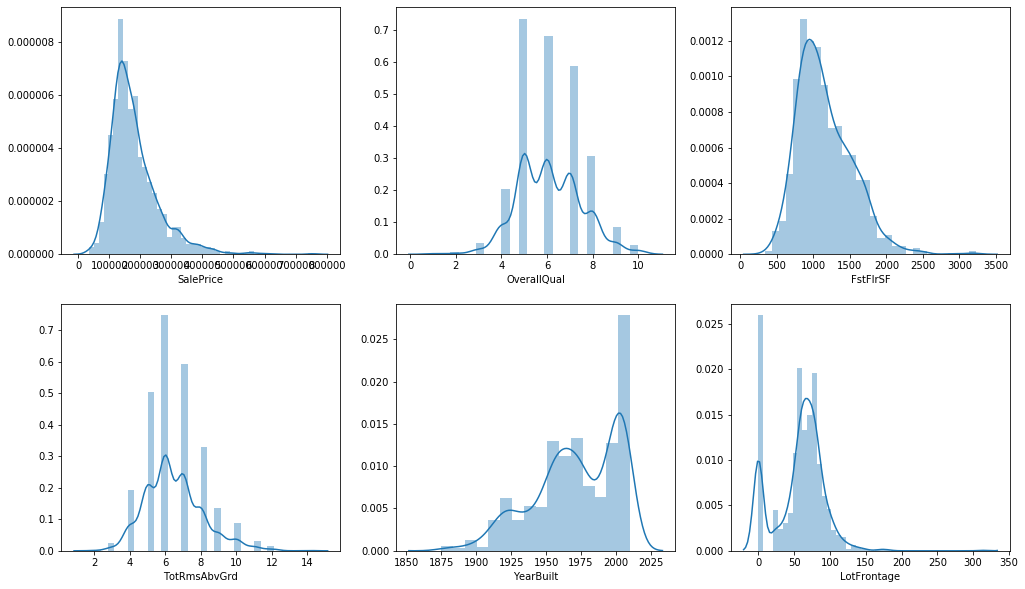

In [28]:
f, axes = plt.subplots(2, 3, figsize=(17, 10))
sb.distplot( dt["SalePrice"] , ax=axes[0, 0])
sb.distplot( dt["OverallQual"] , ax=axes[0, 1])
sb.distplot( dt["FstFlrSF"] , ax=axes[0, 2])
sb.distplot( dt["TotRmsAbvGrd"] , ax=axes[1, 0])
sb.distplot( dt["YearBuilt"] , ax=axes[1, 1])
sb.distplot( dt["LotFrontage"] , ax=axes[1, 2])



In [29]:
#ax0 = sb.distplot(dt['SalePrice'])
#ax1 = sb.distplot(dt['OverallQual'])
#ax2 = sb.distplot(dt['FstFlrSF'])
#ax3 = sb.distplot(dt['TotRmsAbvGrd'])
#ax4 = sb.distplot(dt['YearBuilt'])
#ax5 = sb.distplot(dt['LotFrontage'])


In [31]:
#ax = sb.scatterplot(x="OverallQual", y="SalePrice", data=dt)
#ax = sb.scatterplot(x="FstFlrSF", y="SalePrice", data=dt)
#plt.figure()
#plt.scatter(dt['OverallQual'],dt['SalePrice'])
#plt.title('hola')
#plt.show()

In [32]:
cof_mat = np.corrcoef([dt[cols[1]],dt[cols[2]],dt[cols[3]],dt[cols[4]],dt[cols[5]],dt[cols[0]]])
coef = cof_mat[5:][0]
#np.corrcoef([dt[cols[2]],dt[cols[0]]])
#np.corrcoef([1,2,3],[3,3,5])
coef[0]

0.7939900504626405

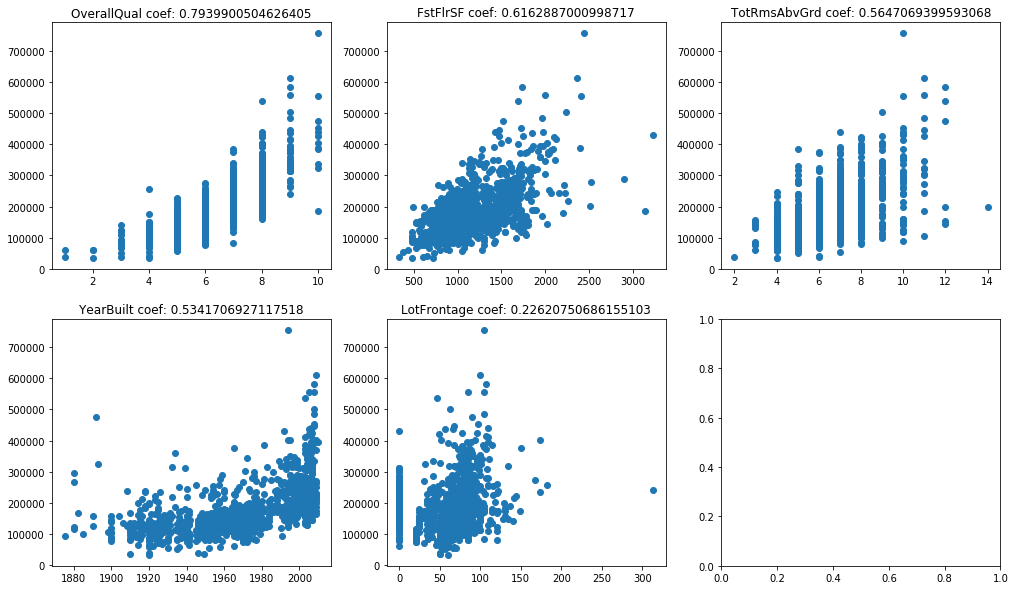

In [33]:
fig, axs = plt.subplots(2, 3, figsize=(17, 10))
axs[0, 0].scatter(dt[cols[1]],dt[cols[0]])
axs[0, 0].set_title(cols[1] + " coef: " + str(coef[0]))
axs[0, 1].scatter(dt[cols[2]],dt[cols[0]])
axs[0, 1].set_title(cols[2] + " coef: " + str(coef[1]))
axs[0, 2].scatter(dt[cols[3]],dt[cols[0]])
axs[0, 2].set_title(cols[3] + " coef: " + str(coef[2]))
axs[1, 0].scatter(dt[cols[4]],dt[cols[0]])
axs[1, 0].set_title(cols[4] + " coef: " + str(coef[3]))
axs[1, 1].scatter(dt[cols[5]],dt[cols[0]])
axs[1, 1].set_title(cols[5] + " coef: " + str(coef[4]))

plt.show()

#### Seleccion de variables

Variables con mayor correlacion:
    
    OverallQual
    FstFlrSF

#### Funcion de regrecion lineal

In [210]:
def sigmoid(x): #convertir los valores de x al rango de 0 a 1
    
    return 1/(1+np.exp(-x))

In [543]:
def lineal_reg(x,y,epochs,imprimir_error_cada=0,lr=0.1):
    
    parametros = np.array([0.7,0.7])
    error = np.zeros(epochs)
    modelo = {}
    #print(x)
    nc = np.ones_like(x)  # lista de unos
    #print(nc)
    
    # conversion de filas a columnas y concatenacion horizontal
    nh = np.hstack((np.expand_dims(x,1),np.expand_dims(nc,1))) 
    #print(nh, nh.shape)
    #print(parametros.shape)
    #print(nh[0][2])
    
    for i in range(epochs):
        modelo[i] = parametros
        yhat = np.matmul(nh,parametros)
        dify = yhat - y
        
        error[i] = 1/2 * np.average(np.power(dify,2))
        
        if (i+1)%imprimir_error_cada == 0:
            print(i+1,'Error actual: ', error[i])
        #print(yhat*x)
        #grad_m = np.average((yhat - y) * x)
        #grad_b = np.average(yhat - y)
        #print(grad_m)
        #print(grad_b)
        #print(dify.shape, nh.shape)
        #print(dify)
        #print( nh)
        grad = np.matmul(dify, nh)/dify.shape[0]
        #print(grad)
        parametros = [parametros[0] - lr*grad[0], parametros[1]-lr*grad[1]]
        #print(parametros)
    #print(error)
    return modelo,error

test = lineal_reg([1,3,5],[10,20,30],15,3,0.1)
#print(resultado[0])
#print(resultado[1])


3 Error actual:  1.5461596707818919
6 Error actual:  0.8128777140379365
9 Error actual:  0.7137485828614544
12 Error actual:  0.6268121895367329
15 Error actual:  0.5504648927608107


In [544]:
#y_reg =  sigmoid(dt[cols[0]]) #dt[cols[0]]/1000
x1_reg = dt[cols[1]]/120 #sigmoid(dt[cols[1]])
#x2_reg = sigmoid(dt[cols[2]]) #dt[cols[2]]/1000
x2_reg = dt[cols[2]]/1000

y_reg = dt[cols[0]] /100000
#print(x1_reg)

#x1_reg = sigmoid(dt[cols[1]])
#print(x1_reg)
#print(dt[cols[2]])

#resultado1 = lineal_reg(dt[cols[1]],y_reg,25,5,0.1)
#resultado2 = lineal_reg(dt[cols[2]],y_reg,75,5,0.05)

resultado1 = lineal_reg(x1_reg,y_reg,75,10,0.5)
resultado2 = lineal_reg(x2_reg,y_reg,75,10,0.1)

#print(resultado[0])
#print(resultado[1])


10 Error actual:  0.304728539823092
20 Error actual:  0.3044768666320975
30 Error actual:  0.30422760816645145
40 Error actual:  0.30397867707156867
50 Error actual:  0.3037300729156025
60 Error actual:  0.30348179526916097
70 Error actual:  0.30323384370341566
10 Error actual:  0.2050874206001418
20 Error actual:  0.20337120207949835
30 Error actual:  0.20217758849039205
40 Error actual:  0.20111575536704113
50 Error actual:  0.20016998698089042
60 Error actual:  0.19932759216706558
70 Error actual:  0.19857727205716832


### Grafica de error

In [545]:
def graph_error(error):
    x = np.linspace(1,len(error),len(error))
    y = error

    plt.plot(x,y)

    plt.xlabel('# Iteracion')
    plt.ylabel('Val Err')
    plt.title('Grafica de error')


    plt.show()

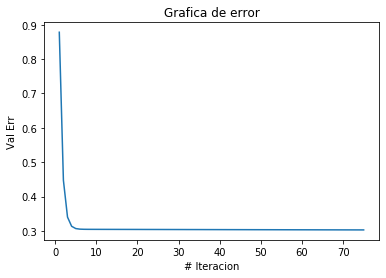

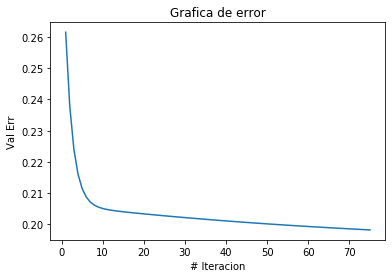

In [546]:
graph_error(resultado1[1])
graph_error(resultado2[1])

### Grafica del modelo

Se estan graficando los valores **m** y **b** de cada modelo

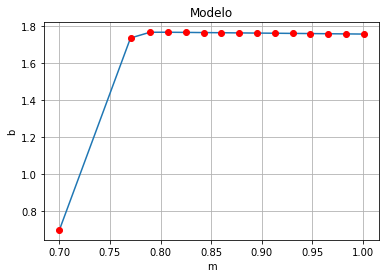

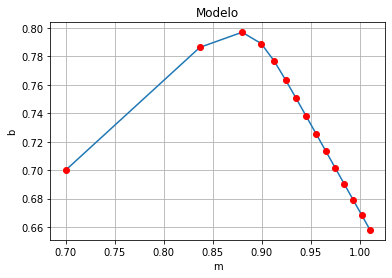

In [547]:
def graph_modelo(modelo,n):
    # se extraen las llaves del dic
    keys = np.array(list(modelo.keys()))
    # se obtienen solo los valoes del dic cada 'n'
    valores = np.array([modelo[i] for i in keys[keys%n==0]])
    
    #Se asigna los valores m y b como XY
    x = valores[:,0]
    y = valores[:,1]
    #print(x)
    #print(y)
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1) #creamos un canvas con  1 fila, 1 columna y devolvemos una referencia a la primera grafica
    ax.grid()

    ax.plot(x,y) #
    ax.plot(x,y,'ro')

    ax.set_xlabel('m')
    ax.set_ylabel('b')
    ax.set_title('Modelo')

    plt.show()

graph_modelo(resultado1[0],5)
graph_modelo(resultado2[0],5)

In [548]:
## Ultimos valores del modelo manual
print('para X1: ',resultado1[0][len(resultado1[0])-1])
print('para X2: ',resultado2[0][len(resultado2[0])-1])


para X1:  [1.014987670015503, 1.7546562522905267]
para X2:  [1.017005140182596, 0.6499214038967677]


#### Aclaracion

El modelo se probo de diversas formas hasta llegar a la configuracion actual

### Usando SciKit learn

In [549]:
x1_reg = np.array(dt[cols[1]]/120) #sigmoid(dt[cols[1]])

x2_reg = np.array(dt[cols[2]]/1000)

y_reg = np.array(dt[cols[0]] /100000)

#print(x1_reg.shape)
#print(x2_reg.shape)
#print(y_reg.shape)
sc_x1 = x1_reg.reshape(-1,1)
sc_x2 = x2_reg.reshape(-1,1)
sc_y = y_reg.reshape(-1,1)
#print(sc_x1)
#print(sc_y)

reg_sc1 =  LinearRegression().fit(sc_x1,sc_y)

reg_sc2 =  LinearRegression().fit(sc_x2,sc_y)
print(reg_sc1.coef_,reg_sc1.intercept_)
print(reg_sc2.coef_,reg_sc2.intercept_)


[[54.49439853]] [-0.96469571]
[[1.29951242]] [0.30324585]


In [551]:
def comparacion(custom, auto, x):

    o = np.ones_like(x)
    op = np.vstack((x,o)).T
    #print(op)
    res_manual = np.matmul(op,custom)
    res_auto = np.matmul(op,auto)
    res_avg = (res_manual + res_auto) / 2
    return res_manual,res_auto, res_avg




In [553]:
manual_x1 = resultado1[0][len(resultado1[0])-1]
manual_x2 = resultado2[0][len(resultado2[0])-1]

auto_x1 = np.hstack((reg_sc1.coef_[0],reg_sc1.intercept_))
auto_x2 = np.hstack((reg_sc2.coef_[0],reg_sc2.intercept_))
a = comparacion (manual_x1,auto_x1,x)

print(a[0])
print(a[1])
print(a[2])

#print(comparacion([5.82,-5.24],[1.29,0.30],[20,30,99]))

[ 22.05440965  32.20428635 102.23843558]
[1088.92327499 1633.86726034 5393.98075925]
[ 555.48884232  833.03577334 2748.10959742]


### Comprobacion de modelos

In [554]:
### carga de datos de prueba
datatest = data[tlargo:]
dtest = pd.DataFrame(datatest,columns=cols)
dtest

,SalePrice,OverallQual,FstFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,235000.0,6.0,1236.0,7.0,1935.0,120.0
1,625000.0,10.0,1831.0,10.0,1995.0,118.0
2,171000.0,6.0,1118.0,6.0,1977.0,76.0
3,163000.0,6.0,1261.0,6.0,1958.0,76.0
4,171900.0,7.0,625.0,5.0,2006.0,35.0
...,...,...,...,...,...,...
287,175000.0,6.0,953.0,7.0,1999.0,62.0
288,210000.0,6.0,2073.0,7.0,1978.0,85.0
289,266500.0,7.0,1188.0,9.0,1941.0,66.0
290,142125.0,5.0,1078.0,5.0,1950.0,68.0


[0.3278934560525572, 0.22577004738458073]
[0.13150913044743198, 0.22927691373459366]


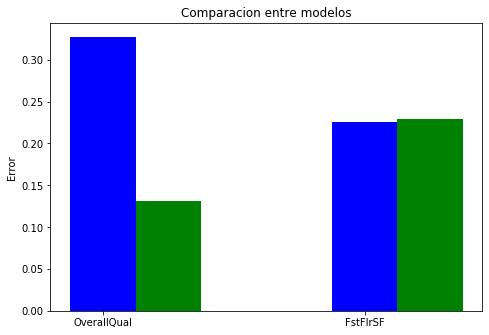

In [591]:
xt1_reg = dtest[cols[1]]/120 #sigmoid(dt[cols[1]])
xt2_reg = dtest[cols[2]]/1000
yt_reg = dtest[cols[0]] /100000

#test1 = lineal_reg(xt1_reg,yt_reg,75,10,0.05)
#test2 = lineal_reg(xt2_reg,yt_reg,75,10,0.5)
yhat_test1 = comparacion (manual_x1,auto_x1,xt1_reg)

yhat_test2 = comparacion (manual_x2,auto_x2,xt2_reg)

error1_test1 = 1/2 * np.average(np.power(yhat_test1[0] - yt_reg,2))
error1_test2 = 1/2 * np.average(np.power(yhat_test1[1] - yt_reg,2))
#error_test3 = 1/2 * np.average(np.power(yhat_test3[2] - yt_reg,2))

error2_test1 = 1/2 * np.average(np.power(yhat_test2[0] - yt_reg,2))
error2_test2 = 1/2 * np.average(np.power(yhat_test2[1] - yt_reg,2))


#print(error1_test1,error1_test2)
#print(error2_test1,error2_test2)

labels = [cols[1],cols[2]]
error_manual = [error1_test1,error2_test1]
error_auto = [error1_test2,error2_test2]

print(error_manual)
print(error_auto)
esp = np.arange(len(labels))


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.set_ylabel('Error')
ax.set_title('Comparacion entre modelos')
ax.set_xticks(esp)
ax.set_xticklabels(labels)


ax.bar(esp + 0.00, error_manual, color = 'b', width = 0.25)
ax.bar(esp + 0.25, error_auto, color = 'g', width = 0.25)

plt.show()

### Conclusion


En el caso de la primer variable el modelo de scikit presenta menos errores, mientras que para la segunda variable el modelo manual tiene una leve diferencia

El modelo manual no es tan refinado, y se podrian buscar mejores valores para disminuir su error medio.  Ya que la eleccion de valores iniciales como el learning rate y los parametros fueron seleccionados al azar